In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
#from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib as plt

In [2]:
KDDTrain = pd.read_csv('C:/Users/Harshitha Rao/sjsu_ns_pjt/KDDTrain+.csv')
KDDTest = pd.read_csv('C:/Users/Harshitha Rao/sjsu_ns_pjt/KDDTest+.csv')
frames = [KDDTrain, KDDTest] 
KDD = pd.concat(frames)
mapping = {'ipsweep': 'Probe','satan': 'Probe','nmap': 'Probe','portsweep': 'Probe','saint': 'Probe','mscan': 'Probe',
        'teardrop': 'DoS','pod': 'DoS','land': 'DoS','back': 'DoS','neptune': 'DoS','smurf': 'DoS','mailbomb': 'DoS',
        'udpstorm': 'DoS','apache2': 'DoS','processtable': 'DoS',
        'perl': 'U2R','loadmodule': 'U2R','rootkit': 'U2R','buffer_overflow': 'U2R','xterm': 'U2R','ps': 'U2R',
        'sqlattack': 'U2R','httptunnel': 'U2R',
        'ftp_write': 'R2L','phf': 'R2L','guess_passwd': 'R2L','warezmaster': 'R2L','warezclient': 'R2L','imap': 'R2L',
        'spy': 'R2L','multihop': 'R2L','named': 'R2L','snmpguess': 'R2L','worm': 'R2L','snmpgetattack': 'R2L',
        'xsnoop': 'R2L','xlock': 'R2L','sendmail': 'R2L',
        'normal': 'Normal'}

KDD['attack_class'] = KDD['Label'].apply(lambda v: mapping[v])
KDD.drop(['Label'],axis=1,inplace=True)
        

categorical_vars = ['Protocol Type', 'Service' , 'Flag']                      
KDDTrain_as = pd.get_dummies(KDD, columns= categorical_vars)


label_encoder=LabelEncoder()

KDDTrain_as['attack_class']= label_encoder.fit_transform(KDDTrain_as['attack_class'])             # encoding the values




features = KDDTrain_as.drop(['attack_class'], axis=1)                                  # determine the feature and label                    
label = KDDTrain_as['attack_class']

x_train,x_test,y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=42)


model = DecisionTreeClassifier(max_depth=3)                   # decision tree
model = model.fit(x_train,y_train)
predicts = model.predict(x_test) 
acc=metrics.accuracy_score(y_test,predicts)                   #accuracy
acc

0.9407038333782206

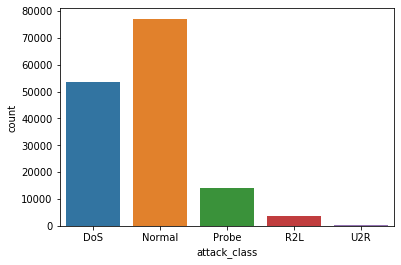

In [3]:
sns.countplot(x = 'attack_class', data = KDD)

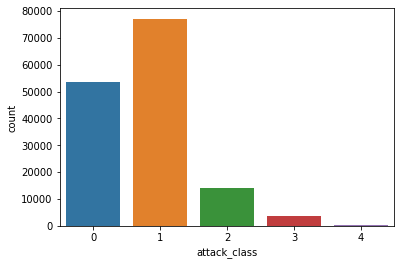

In [4]:
sns.countplot(x = 'attack_class', data = KDDTrain_as)

In [94]:
KDDTrain['Label'].unique()

array(['neptune', 'normal', 'saint', 'mscan', 'guess_passwd', 'smurf',
       'apache2', 'satan', 'buffer_overflow', 'back', 'warezmaster',
       'snmpgetattack', 'processtable', 'pod', 'httptunnel', 'nmap', 'ps',
       'snmpguess', 'ipsweep', 'mailbomb', 'portsweep', 'multihop',
       'named', 'sendmail', 'loadmodule', 'xterm', 'worm', 'teardrop',
       'rootkit', 'xlock', 'perl', 'land', 'xsnoop', 'sqlattack',
       'ftp_write', 'imap', 'udpstorm', 'phf'], dtype=object)

In [69]:
KDDTest['Label'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [83]:
print(metrics.confusion_matrix(y_test,predicts))  
print(metrics.classification_report(y_test,predicts))

[[14854    84   386   649     0]
 [   99 22429   376   324     0]
 [  205    64  3831    89     0]
 [    0   103   195   800     0]
 [    0     1    35    32     0]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.95     15973
           1       0.99      0.97      0.98     23228
           2       0.79      0.91      0.85      4189
           3       0.42      0.73      0.53      1098
           4       0.00      0.00      0.00        68

    accuracy                           0.94     44556
   macro avg       0.64      0.71      0.66     44556
weighted avg       0.95      0.94      0.94     44556

